# TAHMO station data
The following notebook elaborates on how to use the TWIGA API to retrieve and work with data from TAHMO stations.

In [1]:
#############################
# Load some libraries       #
#############################
import requests
import json
import datetime
import pandas as pd
import matplotlib
import numpy as np

import pprint
pp = pprint.PrettyPrinter(depth=1)

# plot figures directly into the notebook
%matplotlib inline

In [2]:
#############################
# TWIGA API settings        #
#############################

# The HydroNET/TWIGA API endpoint
api = 'https://hnapi.hydronet.com/api/'

# The bearer token for the TWIGA user
# this token is used to identify as a valid TWIGA user to the API
api_token = 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJZX2pEcG9IWUY3b3lxOWxsVVFoRTlqUTVwb0NfdkZ6MVQ0V19pTW00encwIn0.eyJleHAiOjE2NjY0MTYwMDgsImlhdCI6MTYzNDg4MDAwOCwianRpIjoiMWJlZmFkNzEtNWNlMy00NzZiLWJkNzEtOWI5ZGMxMjVjYWMxIiwiaXNzIjoiaHR0cHM6Ly9sb2dpbi5oeWRyb25ldC5jb20vYXV0aC9yZWFsbXMvaHlkcm9uZXQiLCJhdWQiOlsicG9ydGFsLmJhY2tlbmQuYXBpIiwiYWNjb3VudCJdLCJzdWIiOiI3Njg2ZmZiMy02NzRjLTRiMzEtYTdkZi0zYjNmZTJhYzQ4MTkiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJhcGktaHlkcm9uZXQtdHdpZ2EiLCJhY3IiOiIxIiwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50IiwibWFuYWdlLWFjY291bnQtbGlua3MiLCJ2aWV3LXByb2ZpbGUiXX19LCJzY29wZSI6ImVtYWlsIHByb2ZpbGUiLCJjbGllbnRJZCI6ImFwaS1oeWRyb25ldC10d2lnYSIsImVtYWlsX3ZlcmlmaWVkIjpmYWxzZSwiY2xpZW50SG9zdCI6IjE5Mi4xNjguMTIuMTEyOjYwMTcyIiwicHJlZmVycmVkX3VzZXJuYW1lIjoic2VydmljZS1hY2NvdW50LWFwaS1oeWRyb25ldC10d2lnYSIsImNsaWVudEFkZHJlc3MiOiIxOTIuMTY4LjEyLjExMjo2MDE3MiJ9.p13NIP-_zpr7NOJ1i2r9JeIhBi-Sj_c1p12OWL7eENYWsSwOPohgjTrKsFLgtoJKqmmzUcFWnJ7xjs8VIq5iMYgCur0VPA0dTp3ngBCGUc_9hXjbhvPScMmJJ_cZQE-FCJYtuQubA2BFKwaaFYIj-7sp8Hr74ikfMRReRBUFt8C3LdowoJz5WJTpzbQvK_rFnGkscG8NxGziEghU5AchNliJhdqqUVVOcudN43i4rxK1kX2WPfYF_JlYQdYVs4DmqF8xoA4Lzay7QH3-0hEGvsspxRPMCGWcEkWKIrmXUwuzGhsVS1g-wO6pvA6-2XFEo3erHqtdeyN7DaMWPu4mtw'

# Using the token, generate a valid header for requests to the API
api_header = {'content-type': 'application/json', 'Authorization': 'bearer ' + api_token}


# Accessing the available data sources
The TWIGA api holds a lot of data. There are different data sources available, each containing relevant data for TWIGA. Using the API one can request data of any of the TWIGA data sources. If you know which datasource you are intersted in, you can direct request data from iw. However, often one of the first steps is to look into what data sources are available.

Getting an overview of the different data sources can be done by sending a request to the 'datasources' endpoint of the TWIGA API.

In [3]:
# an empty request which can be send to the TWIGA API
datasource_metadata = {}

# Send the request to the datasources endpoint of the API
datasource_response = requests.post(api + 'entity/datasources/get', headers=api_header, data=json.dumps(datasource_metadata))

# The response of the API is in JSON. Parse this with Python
datasource_metadata = datasource_response.json()

# print the result, as indented json
pp.pprint(json.dumps(datasource_metadata, indent=2))




('{\n'
 '  "DataSources": {\n'
 '    "Rain4Africa.SouthernAfrica.UnifiedModel.Deterministic.4km": {\n'
 '      "Name": "UM DET 3d 4km 1h SADC",\n'
 '      "Code": "Rain4Africa.SouthernAfrica.UnifiedModel.Deterministic.4km",\n'
 '      "Settings": {\n'
 '        "ChunkSizeX": 10,\n'
 '        "ChunkSizeY": 10,\n'
 '        "ChunkSizeTime": 1,\n'
 '        "ChunkSizeModels": 1,\n'
 '        "Compression": true,\n'
 '        "DeflateLevel": 5,\n'
 '        "StoreInterval": "Days",\n'
 '        "FileFormatId": 3,\n'
 '        "SplitByVariable": true,\n'
 '        "SplitByEnsemble": false,\n'
 '        "SplitByModelTimeStep": false,\n'
 '        "SplitByLocation": false,\n'
 '        "SplitByUnit": false,\n'
 '        "FileDateOffSetInMinutes": 0,\n'
 '        "Grid": {\n'
 '          "GridDefinitionId": 27,\n'
 '          "Pyramid": {\n'
 '            "MaxPixelCount": 80000,\n'
 '            "PreferredPixelCount": 80000,\n'
 '            "Interpolation": "Average"\n'
 '          }\n'
 '   

# Questions
Question 1, How many datasources are available in the TWIGA platform?
hint, use the len() function of python

In [4]:
# Answer space
#print(len(datasource_metadata))  

# ---> Is this correct? How to retrieve the name of these datasources and list them?


# The API returns a JSON with all the information
# this JSON is parsed into a python dictionary
# the raw data above shows that there is a key called DataSources
# this key can be referenced, to get the total number of available data sources
print(f"There are a total of {len(datasource_metadata['DataSources'])} datasources in the API\n")
# which gives you a total of 21 data sources as the time of writing

# as the json is parsed as a dictionary, we can extract information using the keys
print("The datasources codes/names are:")
for key, value in datasource_metadata["DataSources"].items() :
    print(key)

There are a total of 35 datasources in the API

The datasources codes/names are:
Rain4Africa.SouthernAfrica.UnifiedModel.Deterministic.4km
HydroNet.ShapeFiles
Rain4Africa.SouthAfrica.Evapotranspiration.4km
Noaa.Gfs
Noaa.Gfs.1h
Saws.Stations.5
Saws.Stations.Aws
Twiga.MapYourCrop.Catandica
Twiga.MapYourCrop.Tica
Twiga.VegMon
Twiga.Heatstress.Forecast
Twiga.MapYourCrop.Mozambique.Cebola
Tahmo.Stations.Data.Distribution.Hourly
Gnss.Stations
Saws.Satellite
TWIGA.Dam.Waterbalance
Distro.Stations
Twiga.MapYourCrop.Mozambique.Modesto
Twiga.MapYourCrop.Mozambique.Naume
Twiga.MapYourCrop.Mozambique.Ananias
Twiga.MapYourCrop.Mozambique.Saunhama
Twiga.MapYourCrop.Mozambique.TimeSeries
TWIGA.Starlab.SoilMoisture
Twiga.Icon.D2
InfoSequia.Inkomati.SPI
InfoSequia.Inkomati.SPEI
InfoSequia.Inkomati.PPERC
InfoSequia.Inkomati.VH
Fao.Wapor.SouthAfrica
Fao.Wapor.Mozambique
Fao.Wapor.Kenya.Uganda
Fao.Wapor.Ghana
Twiga.Bui
Gnss.Maps.SouthAfrica
Gnss.Maps.Uganda


In [5]:
# From the response of the TWIGA API we can see that 
# there are two TAHMO data sources
# Tahmo.Stations.Data.Distribution.Hourly and Tahmo.Stations.Data.Distribution.Measurements

# the first provides hourly values, the second provides higher resolution data (i.e. 5 minute intervals)

# store the selected data source code

selected_datasource_code = "Tahmo.Stations.Data.Distribution.Hourly"

In [11]:
# json request to ask metadata of a single datasource
request_metadata_tahmo = {
     "DataSourceCodes": [selected_datasource_code]
}

# Send the request to the datasources endpoint of the API
datasource_tahmo_response = requests.post(api + 'entity/datasources/get', headers=api_header, data=json.dumps(request_metadata_tahmo))

# The response of the API is in JSON. Parse this with Python
datasource_tahmo_metadata = datasource_tahmo_response.json()

# print the result, as indented json
print(json.dumps(datasource_tahmo_metadata, indent=2))

{
  "DataSources": {
    "Tahmo.Stations.Data.Distribution.Hourly": {
      "Name": "TAHMO stations via data distribution (Hourly)",
      "Code": "Tahmo.Stations.Data.Distribution.Hourly",
      "Settings": {
        "StoreInterval": "Undefined",
        "FileFormatId": 0,
        "FixedFileFormat": null,
        "FixedFolderFormat": null,
        "SplitByVariable": false,
        "SplitByEnsemble": false,
        "SplitByModelTimeStep": false,
        "SplitByLocation": false,
        "SplitByUnit": false,
        "FileDateOffSetInMinutes": 0,
        "Time": {
          "Interval": {
            "Type": "None",
            "Value": 0
          }
        },
        "AccumulationInterval": "Total",
        "MaximumDelay": {
          "Type": "Days",
          "Value": 2
        },
        "Disclaimer": null,
        "InstanceDataSourceCode": "TAHMO.Hourly",
        "MaxPeriod": {
          "Type": "Days",
          "Value": 180
        },
        "RequestIntervalInMilliseconds": 10
  

In [7]:
# TAHMO stations are spread over continental Africa
# we can ask the available locations through the TWIGA API

# again we define a JSON request which we can send the the TWIGA API
request_locations_tahmo = {
     "DataSourceCodes": [selected_datasource_code]
}

# This time we send the request to the variables endpoint of the API
locations_tahmo_response = requests.post(api + 'entity/locations/get', headers=api_header, data=json.dumps(request_locations_tahmo))

# The response of the API is in JSON. Parse this with Python
locations_tahmo = locations_tahmo_response.json()

# print the result, as indented json
print(json.dumps(locations_tahmo, indent=2))


{
  "Locations": {
    "Tahmo.Stations#TA00001": {
      "Identifier": "Tahmo.Stations#TA00001",
      "LocationId": 23846,
      "Name": "Lela Primary School",
      "Code": "TA00001",
      "X": 34.3979917,
      "Y": -1.1232833,
      "Z": 1393.0,
      "Tags": [],
      "ProjectionId": 3,
      "DataSourceGroupCode": "Tahmo.Stations"
    },
    "Tahmo.Stations#TA00002": {
      "Identifier": "Tahmo.Stations#TA00002",
      "LocationId": 23847,
      "Name": "Benso SHS",
      "Code": "TA00002",
      "X": -1.881544448,
      "Y": 5.152566725,
      "Z": 86.1,
      "Tags": [],
      "ProjectionId": 3,
      "DataSourceGroupCode": "Tahmo.Stations"
    },
    "Tahmo.Stations#TA00003": {
      "Identifier": "Tahmo.Stations#TA00003",
      "LocationId": 23848,
      "Name": "Prestea SHTS",
      "Code": "TA00003",
      "X": -2.1339285,
      "Y": 5.4468564,
      "Z": 63.0,
      "Tags": [],
      "ProjectionId": 3,
      "DataSourceGroupCode": "Tahmo.Stations"
    },
    "Tahmo.Stati

In [24]:
locations_tahmo = locations_tahmo_response.content.decode()
df=pd.DataFrame()

TypeError: string indices must be integers

# Question
Question, How many TAHMO locations are available?

Bonus, try and plot them on a map

In [8]:
# Answer space

# ---> SC: Please add the solution


# This is very similar as the example above
print(f"There are a total of {len(locations_tahmo['Locations'])} locations in the TAHMO datasource\n")
# which gives you a total of 21 data sources as the time of writing

# as the json is parsed as a dictionary, we can extract information using the keys
# either by key name, or by inde
print("The location codes are:")
for key, value in locations_tahmo["Locations"].items() :
    print(key)


There are a total of 686 locations in the TAHMO datasource

The location codes are:
Tahmo.Stations#TA00001
Tahmo.Stations#TA00002
Tahmo.Stations#TA00003
Tahmo.Stations#TA00004
Tahmo.Stations#TA00005
Tahmo.Stations#TA00006
Tahmo.Stations#TA00007
Tahmo.Stations#TA00008
Tahmo.Stations#TA00009
Tahmo.Stations#TA00010
Tahmo.Stations#TA00011
Tahmo.Stations#TA00012
Tahmo.Stations#TA00013
Tahmo.Stations#TA00014
Tahmo.Stations#TA00015
Tahmo.Stations#TA00016
Tahmo.Stations#TA00018
Tahmo.Stations#TA00019
Tahmo.Stations#TA00020
Tahmo.Stations#TA00021
Tahmo.Stations#TA00022
Tahmo.Stations#TA00023
Tahmo.Stations#TA00024
Tahmo.Stations#TA00025
Tahmo.Stations#TA00026
Tahmo.Stations#TA00027
Tahmo.Stations#TA00028
Tahmo.Stations#TA00029
Tahmo.Stations#TA00030
Tahmo.Stations#TA00031
Tahmo.Stations#TA00032
Tahmo.Stations#TA00033
Tahmo.Stations#TA00034
Tahmo.Stations#TA00035
Tahmo.Stations#TA00036
Tahmo.Stations#TA00037
Tahmo.Stations#TA00038
Tahmo.Stations#TA00039
Tahmo.Stations#TA00040
Tahmo.Stations#TA00

In [22]:
Location=[]
for key, value in locations_tahmo["Locations"].items() :
    Location.append(value)

len(Location)

TypeError: string indices must be integers

In [31]:
# TAHMO stations can measure multiple variables
# We can ask the API what variables are available

# again we define a JSON request which we can send the the TWIGA API
request_variables_tahmo = {
     "DataSourceCodes": [selected_datasource_code]
}

# This time we send the request to the variables endpoint of the API
variables_tahmo_response = requests.post(api + 'entity/variables/get', headers=api_header, data=json.dumps(request_variables_tahmo))

# The response of the API is in JSON. Parse this with Python
variables_tahmo = variables_tahmo_response.json()

# print the result, as indented json
print(json.dumps(variables_tahmo, indent=2))



{
  "Variables": {
    "P": {
      "Name": "Precipitation",
      "Code": "P",
      "Description": "Precipitation",
      "UnitCode": "mm",
      "State": 1
    },
    "WindDirection": {
      "Name": "Wind Direction",
      "Code": "WindDirection",
      "Description": "Wind Direction (from which blowing)",
      "UnitCode": "deg",
      "State": 1
    },
    "WindSpeed": {
      "Name": "Wind Speed",
      "Code": "WindSpeed",
      "Description": "Wind Speed at surface",
      "UnitCode": "m/s",
      "State": 1
    },
    "WindGusts": {
      "Name": "Wind gusts",
      "Code": "WindGusts",
      "UnitCode": "m/s",
      "State": 1
    },
    "VaporPressure": {
      "Name": "Vapor Pressure",
      "Code": "VaporPressure",
      "UnitCode": "kPa",
      "State": 1
    },
    "TMP": {
      "Name": "Temperature",
      "Code": "TMP",
      "Description": "Temperature 2m above ground",
      "UnitCode": "\u2070C",
      "State": 1
    },
    "RH": {
      "Name": "Relative Humidity

# Question
How many variables are available?

In [34]:
# Lets try and retrieve precipitation data of a TAHMO station in Nairobi

# Can you find the location code of the TAHMO station situated at the Kenya Meteorological Department in Nairobi


{
  "Data": [
    {
      "LocationIdentifier": "Tahmo.Stations#TA00134",
      "LocationCode": "TA00134",
      "UseQuality": true,
      "Data": [
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001000000"
        },
        {
          "Value": 17.8,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001010000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001020000"
        },
        {
          "Value": 0.10200000000000001,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001030000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001040000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001050000"
        },


<AxesSubplot:xlabel='DateTime'>

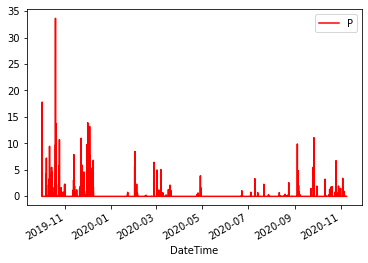

In [43]:
# Try to retrieve data of this TAHMO stations,Nyanza
tahmo_kmd_code = 'TA00134'
request_tahmo_data = {
    "Readers": [{
        "DataSourceCode": selected_datasource_code,
        "Settings": {
            "LocationCodes": [tahmo_kmd_code],
            "VariableCodes": ["P"],
            "StartDate": "20191001000000",
            "EndDate": "20201109000000",
            "StructureType": "TimeSeries"
        }
    }]
}

# send the request to the TWIGA API, this time the modelTimeseries endpoint
data_response = requests.post(api + 'data/get', headers=api_header, data=json.dumps(request_tahmo_data))

# parse response into JSON object
tahmo_data = json.loads(data_response.content.decode('utf-8-sig'))

# print the result, as indented json
print(json.dumps(tahmo_data, indent=2))

tahmo_data_df = pd.DataFrame(tahmo_data['Data'][0]['Data'])

# convert the DateTime from string into datetime objects
tahmo_data_df['DateTime'] = pd.to_datetime(tahmo_data_df['DateTime'])

print(tahmo_data_df)

tahmo_data_df
# rename the Value column to the name of the variable
tahmo_data_df = tahmo_data_df.rename(columns={"Value": "P"})

# we can use this data frame to create a plot of the data
tahmo_data_df.plot(kind='line', x='DateTime', y="P", color='red')


{
  "Data": [
    {
      "LocationIdentifier": "Tahmo.Stations#TA00024",
      "LocationCode": "TA00024",
      "UseQuality": true,
      "Data": [
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001000000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001010000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001020000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001030000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001040000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001050000"
        },
        {
       

<AxesSubplot:xlabel='DateTime'>

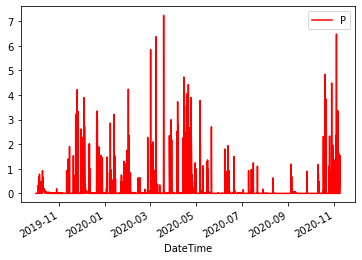

In [44]:
# Try to retrieve data of this TAHMO stations/ Central
tahmo_kmd_code = 'TA00024'
request_tahmo_data = {
    "Readers": [{
        "DataSourceCode": selected_datasource_code,
        "Settings": {
            "LocationCodes": [tahmo_kmd_code],
            "VariableCodes": ["P"],
            "StartDate": "20191001000000",
            "EndDate": "20201109000000",
            "StructureType": "TimeSeries"
        }
    }]
}

# send the request to the TWIGA API, this time the modelTimeseries endpoint
data_response = requests.post(api + 'data/get', headers=api_header, data=json.dumps(request_tahmo_data))

# parse response into JSON object
tahmo_data = json.loads(data_response.content.decode('utf-8-sig'))

# print the result, as indented json
print(json.dumps(tahmo_data, indent=2))

tahmo_data_df = pd.DataFrame(tahmo_data['Data'][0]['Data'])

# convert the DateTime from string into datetime objects
tahmo_data_df['DateTime'] = pd.to_datetime(tahmo_data_df['DateTime'])

print(tahmo_data_df)

tahmo_data_df
# rename the Value column to the name of the variable
tahmo_data_df = tahmo_data_df.rename(columns={"Value": "P"})

# we can use this data frame to create a plot of the data
tahmo_data_df.plot(kind='line', x='DateTime', y="P", color='red')


{
  "Data": [
    {
      "LocationIdentifier": "Tahmo.Stations#TA00389",
      "LocationCode": "TA00389",
      "UseQuality": true,
      "Data": [
        {
          "Value": 0.017,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001000000"
        },
        {
          "Value": 0.017,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001010000"
        },
        {
          "Value": 0.017,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001020000"
        },
        {
          "Value": 0.017,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001030000"
        },
        {
          "Value": 0.017,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001040000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001050000"
        },
       

<AxesSubplot:xlabel='DateTime'>

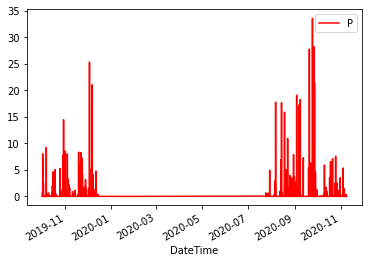

In [50]:
# Try to retrieve data of this TAHMO stations/ Central
tahmo_kmd_code = 'TA00389'
request_tahmo_data = {
    "Readers": [{
        "DataSourceCode": selected_datasource_code,
        "Settings": {
            "LocationCodes": [tahmo_kmd_code],
            "VariableCodes": ["P"],
            "StartDate": "20191001000000",
            "EndDate": "20201109000000",
            "StructureType": "TimeSeries"
        }
    }]
}

# send the request to the TWIGA API, this time the modelTimeseries endpoint
data_response = requests.post(api + 'data/get', headers=api_header, data=json.dumps(request_tahmo_data))

# parse response into JSON object
tahmo_data = json.loads(data_response.content.decode('utf-8-sig'))

# print the result, as indented json
print(json.dumps(tahmo_data, indent=2))

tahmo_data_df1 = pd.DataFrame(tahmo_data['Data'][0]['Data'])

# convert the DateTime from string into datetime objects
tahmo_data_df1['DateTime'] = pd.to_datetime(tahmo_data_df1['DateTime'])

print(tahmo_data_df1)

tahmo_data_df1
# rename the Value column to the name of the variable
tahmo_data_df1 = tahmo_data_df1.rename(columns={"Value": "P"})

# we can use this data frame to create a plot of the data
tahmo_data_df1.plot(kind='line', x='DateTime', y="P", color='red')



{
  "Data": [
    {
      "LocationIdentifier": "Tahmo.Stations#TA00355",
      "LocationCode": "TA00355",
      "UseQuality": true,
      "Data": [
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001000000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001010000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001020000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001030000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001040000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001050000"
        },
        {
       

<AxesSubplot:xlabel='DateTime'>

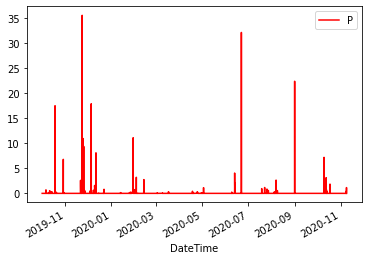

In [51]:

# Try to retrieve data of this TAHMO stations/ turkana
tahmo_kmd_code = 'TA00355'
request_tahmo_data = {
    "Readers": [{
        "DataSourceCode": selected_datasource_code,
        "Settings": {
            "LocationCodes": [tahmo_kmd_code],
            "VariableCodes": ["P"],
            "StartDate": "20191001000000",
            "EndDate": "20201109000000",
            "StructureType": "TimeSeries"
        }
    }]
}

# send the request to the TWIGA API, this time the modelTimeseries endpoint
data_response = requests.post(api + 'data/get', headers=api_header, data=json.dumps(request_tahmo_data))

# parse response into JSON object
tahmo_data = json.loads(data_response.content.decode('utf-8-sig'))

# print the result, as indented json
print(json.dumps(tahmo_data, indent=2))

tahmo_data_df1 = pd.DataFrame(tahmo_data['Data'][0]['Data'])

# convert the DateTime from string into datetime objects
tahmo_data_df1['DateTime'] = pd.to_datetime(tahmo_data_df1['DateTime'])

print(tahmo_data_df1)

tahmo_data_df1
# rename the Value column to the name of the variable
tahmo_data_df1 = tahmo_data_df1.rename(columns={"Value": "P"})

# we can use this data frame to create a plot of the data
tahmo_data_df1.plot(kind='line', x='DateTime', y="P", color='red')



{
  "Data": [
    {
      "LocationIdentifier": "Tahmo.Stations#TA00062",
      "LocationCode": "TA00062",
      "UseQuality": true,
      "Data": [
        {
          "Value": 0.017,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001000000"
        },
        {
          "Value": 0.017,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001010000"
        },
        {
          "Value": 0.017,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001020000"
        },
        {
          "Value": 0.034,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001030000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001040000"
        },
        {
          "Value": 0.0,
          "Quality": "1",
          "Availability": 1,
          "DateTime": "20191001050000"
        },
        {

<AxesSubplot:xlabel='DateTime'>

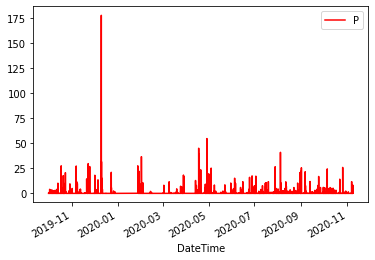

In [52]:
# Try to retrieve data of this TAHMO stations/ westpokot
tahmo_kmd_code = 'TA00062'
request_tahmo_data = {
    "Readers": [{
        "DataSourceCode": selected_datasource_code,
        "Settings": {
            "LocationCodes": [tahmo_kmd_code],
            "VariableCodes": ["P"],
            "StartDate": "20191001000000",
            "EndDate": "20201109000000",
            "StructureType": "TimeSeries"
        }
    }]
}

# send the request to the TWIGA API, this time the modelTimeseries endpoint
data_response = requests.post(api + 'data/get', headers=api_header, data=json.dumps(request_tahmo_data))

# parse response into JSON object
tahmo_data = json.loads(data_response.content.decode('utf-8-sig'))

# print the result, as indented json
print(json.dumps(tahmo_data, indent=2))

tahmo_data_df1 = pd.DataFrame(tahmo_data['Data'][0]['Data'])

# convert the DateTime from string into datetime objects
tahmo_data_df1['DateTime'] = pd.to_datetime(tahmo_data_df1['DateTime'])

print(tahmo_data_df1)

tahmo_data_df1
# rename the Value column to the name of the variable
tahmo_data_df1 = tahmo_data_df1.rename(columns={"Value": "P"})

# we can use this data frame to create a plot of the data
tahmo_data_df1.plot(kind='line', x='DateTime', y="P", color='red')



# Questions
Can you retrieve data from different variables, say Soil Moisture and Temperature?

What is the mean wind speed measured at this station?

The mean windspeed on TAHMO station TA00134 is 0.85 meter per second


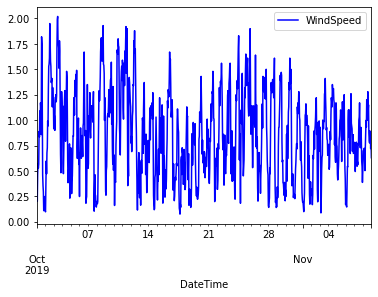

In [16]:
# answer space


# to anwer this we can simply adapt the earlier example of precipitation
# first change the variable in the json request body
# you can find the variable code in the variables_tahmo retrieved earlier

# the json request body, adapted to request windspeed data
request_tahmo_data = {
    "Readers": [{
        "DataSourceCode": selected_datasource_code,
        "Settings": {
            "LocationCodes": [tahmo_kmd_code],
            "VariableCodes": ["WindSpeed"],
            "StartDate": "20191001000000",
            "EndDate": "20191109000000",
            "StructureType": "TimeSeries"
        }
    }]
}

# send the request to the TWIGA API, this time the timeseries endpoint
data_response = requests.post(api + 'timeSeries/get', headers=api_header, data=json.dumps(request_tahmo_data))

# parse response into JSON object
tahmo_data = data_response.json()
# extract relevant data into a pandas dataframe
tahmo_data_df = pd.DataFrame(tahmo_data['Data'][0]['Data'])

# convert the DateTime from string into datetime objects
tahmo_data_df['DateTime'] = pd.to_datetime(tahmo_data_df['DateTime'])

# rename the Value column to the name of the variable
tahmo_data_df = tahmo_data_df.rename(columns={"Value": "WindSpeed"})

# we can use this data frame to create a plot of the data
tahmo_data_df.plot(kind='line', x='DateTime', y='WindSpeed', color='blue')

# finally derive the mean WindSpeed
mean_windspeed = tahmo_data_df['WindSpeed'].mean()
print(f"The mean windspeed on TAHMO station {tahmo_kmd_code} is {mean_windspeed.round(2)} meter per second")

# Questions

Can you get data from a TAHMO station but now the high resolution (5 minute) data

If you have already worked on the notebook on the Unified Model data:
Try and compare the measured precipitation on a TAHMO station with data from the Saws Satellite product.